#Resnet Week 5 Colab Prototype

Data: PIC_NUMBER = 25, THRESHOLD = 100

Runtime: changed runtime type to GPU

Files setting: Mount to Google Drive

In [ ]:
# IMPORTANT
# for compatible torch, otherwise would have to directly edit the fastai files 
# as shown here: https://forums.fast.ai/t/fastai-throwing-a-runtime-error-when-using-custom-train-test-sets/70262/6
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 31.5MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [13]:
# if not done so, mount your drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# first, unzip the uploaded file
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/My Drive/Junior/CS121/artData/small_20_100_data.zip', 'r')
directory_to_extract_to = '/content/drive/My Drive/Junior/CS121/artData'
zip_ref.extractall(directory_to_extract_to)
zip_ref.close()

In [14]:
# now, find all the classes real quick
import os

data_dir = '/content/drive/My Drive/Junior/CS121/artData/small_25_100_data'
classes = [x[0].replace(data_dir+"/",'') for x in os.walk(data_dir)]

print(classes)
# for mine the first and last part of the list were weird lol
classes = classes[1:-1]
# for yours probably (hopefully) only the first is weird, because it is the name of the folder itself
#classes = classes[1:]
print(classes)

['/content/drive/My Drive/Junior/CS121/artData/small_25_100_data', 'Abstract Art', 'Art Informel', 'Art Nouveau (Modern)', 'Baroque', 'Cubism', 'Expressionism', 'High Renaissance', 'Impressionism', 'Magic Realism', 'Naïve Art (Primitivism)', 'Neoclassicism', 'Post-Impressionism', 'Realism', 'Romanticism', 'Surrealism', 'Ukiyo-e', 'models']
['Abstract Art', 'Art Informel', 'Art Nouveau (Modern)', 'Baroque', 'Cubism', 'Expressionism', 'High Renaissance', 'Impressionism', 'Magic Realism', 'Naïve Art (Primitivism)', 'Neoclassicism', 'Post-Impressionism', 'Realism', 'Romanticism', 'Surrealism', 'Ukiyo-e']


In [15]:
import fastai
from fastai.vision import *

# remove bad images
for c in classes:
    print(c)
    verify_images(data_dir+"/"+c, delete=True, max_size = 500)

Abstract Art


Art Informel


Art Nouveau (Modern)


Baroque


Cubism


Expressionism


High Renaissance


Impressionism


Magic Realism


Naïve Art (Primitivism)


Neoclassicism


Post-Impressionism


Realism


Romanticism


Surrealism


Ukiyo-e


In [16]:
# create the data bunch!

import numpy
np.random.seed(42)
data = ImageDataBunch.from_folder(data_dir, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, bs=16, num_workers=4).normalize(imagenet_stats)

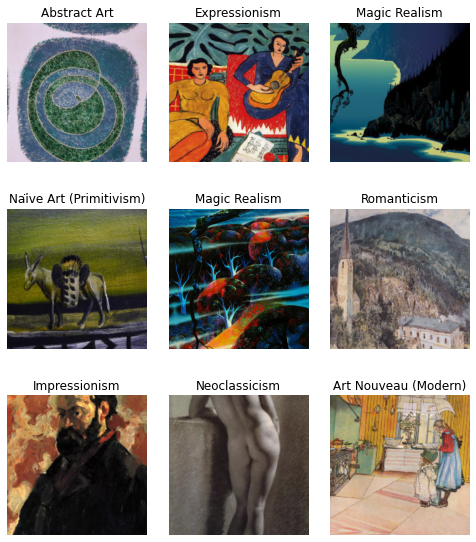

In [17]:
data.show_batch(rows=3, figsize=(7,8))


In [18]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Abstract Art',
  'Art Informel',
  'Art Nouveau (Modern)',
  'Baroque',
  'Cubism',
  'Expressionism',
  'High Renaissance',
  'Impressionism',
  'Magic Realism',
  'Naïve Art (Primitivism)',
  'Neoclassicism',
  'Post-Impressionism',
  'Realism',
  'Romanticism',
  'Surrealism',
  'Ukiyo-e'],
 16,
 320,
 79)

In [19]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [20]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,3.782807,2.797101,0.696203,00:08
1,2.761382,2.588445,0.569620,00:07
2,1.993127,2.526498,0.620253,00:07
3,1.500889,2.409621,0.607595,00:07


In [21]:
learn.save('stage-1')


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


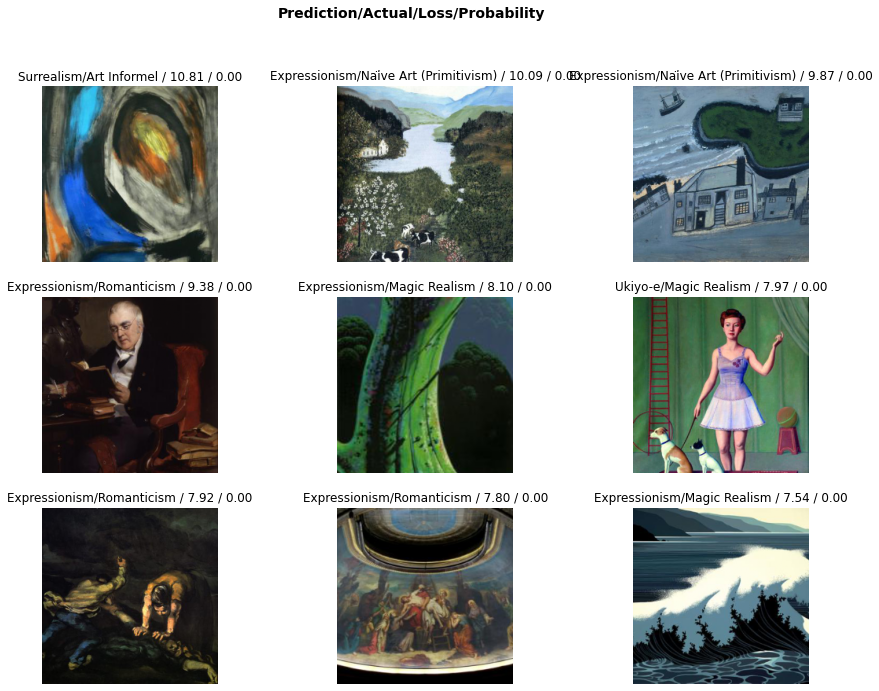

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))


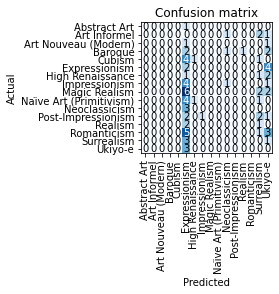

In [ ]:
interp.most_confused(min_val=2)

#confusion matrix! Not sure helpful tho
interp.plot_confusion_matrix()



Improving the Model

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


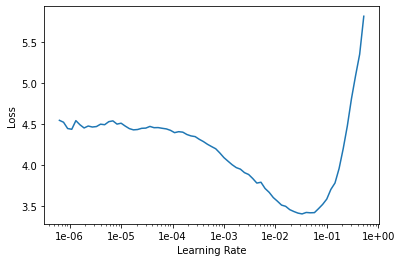

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.unfreeze()
# using new learning rate here
learn.fit_one_cycle(15,max_lr=slice(3e-4,3e-2))
learn.save('stage-2')

epoch,train_loss,valid_loss,error_rate,time
0,2.760569,2.747052,0.860759,00:05
1,2.786661,2.769896,0.848101,00:05
2,2.836190,2.913334,0.898734,00:05
3,2.966957,3.073316,0.911392,00:05
4,3.083085,3.941797,0.924051,00:05
5,3.186091,4.385422,0.911392,00:05
6,3.223214,3.224835,0.873418,00:05
7,3.225511,2.903322,0.873418,00:05
8,3.185221,3.819307,0.924051,00:05
9,3.125337,2.929777,0.860759,00:05


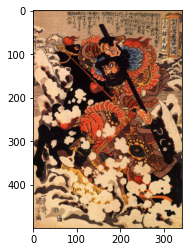

In [27]:
# read an image to predict

import matplotlib.pyplot as plt
image = plt.imread('/content/drive/My Drive/Junior/CS121/artData/small_25_100_data/Ukiyo-e/1979.jpg')

In [30]:
image = open_image('/content/drive/My Drive/Junior/CS121/artData/small_25_100_data/Ukiyo-e/1979.jpg')
pred, tensor, prob = learn.predict(image)
print(pred)

Ukiyo-e


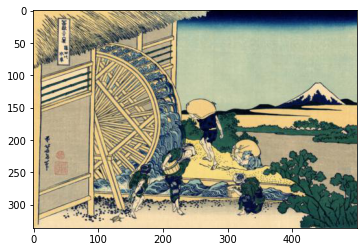

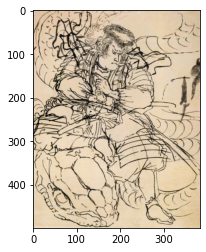

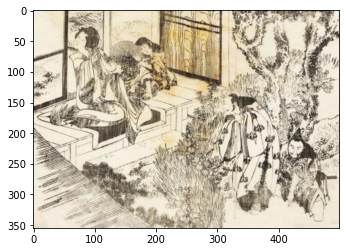

In [55]:
# display random images of the same style

import random

class_folder = data_dir + "/" + str(pred)

num_images = 3
sim_images = []

for root, dir, files in os.walk(class_folder):
  while len(sim_images) < num_images:
    img_name = random.choice(files)
    if img_name not in sim_images:
      sim_images.append(img_name)

      # I wasn't able to display multiple images using open_image, so this will be fine for now
      # Not sure how we're going to want this with the integration (save to file, etc)
      img = plt.imread(class_folder + "/" + random.choice(files))
      show = plt.imshow(img)
      plt.show()
  
